In [1]:
import pulp

In [80]:
import matplotlib.pyplot as plt 

In [2]:
import numpy as np 

In [40]:
N = 50
agents = np.zeros((N, 2))

In [41]:
# all agents have same value of good 
agents[:, 0] = np.random.randint(1, 101, N)
# half agents are poor
agents[: N // 2, 1] = np.random.randint(80, 101, N // 2)
# other half are rich 
agents[N // 2 :, 1] = np.random.randint(1, 11, N // 2)

In [42]:
agents

array([[ 24.,  93.],
       [ 40.,  85.],
       [ 58.,  85.],
       [ 49.,  95.],
       [ 77.,  81.],
       [ 28.,  95.],
       [ 87., 100.],
       [ 78.,  98.],
       [  1.,  85.],
       [ 46.,  82.],
       [ 67.,  81.],
       [ 54.,  92.],
       [ 39.,  91.],
       [ 47.,  88.],
       [ 12.,  83.],
       [ 35.,  81.],
       [ 67.,  83.],
       [ 86.,  86.],
       [ 22., 100.],
       [ 52.,  80.],
       [  7.,  91.],
       [ 93.,  99.],
       [ 89.,  90.],
       [  7.,  87.],
       [  2.,  91.],
       [ 27.,   4.],
       [ 82.,   8.],
       [ 76.,   4.],
       [ 15.,   8.],
       [ 99.,  10.],
       [  2.,   7.],
       [  6.,   9.],
       [ 35.,   9.],
       [ 96.,   6.],
       [ 89.,   9.],
       [ 16.,   5.],
       [ 38.,   5.],
       [ 16.,  10.],
       [ 69.,   3.],
       [ 32.,   6.],
       [ 50.,   5.],
       [ 30.,   4.],
       [ 70.,  10.],
       [ 56.,   1.],
       [ 33.,   4.],
       [ 27.,   6.],
       [ 49.,   3.],
       [ 53.,

In [164]:
M = 10
#alpha = np.mean(agents[:, 1])
alpha = 0 

In [165]:
prob = pulp.LpProblem("Welfare_Maximization", pulp.LpMaximize)

In [166]:
# Create variables
x = pulp.LpVariable.dicts("Allocation", range(N), 0, 1)  # allocation per agent
p = pulp.LpVariable.dicts("Price", range(N), 0)  # price per agent
t = pulp.LpVariable.dicts("Time", range(N), 0)  # time per agent

In [167]:
# Objective function
prob += pulp.lpSum([agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] + alpha * p[i] for i in range(N)])

In [168]:
# Constraint: sum of the allocations <= M
prob += pulp.lpSum(x) <= M

In [169]:
for i in range(N):
    prob += agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] >= 0  # utility > 0


In [170]:
# Constraints: individual rationality and incentive compatibility
for i in range(N):
    prob += agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] >= 0  # utility > 0
    for j in range(N):
        if i != j:
            prob += agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] >= agents[i][0] * x[j] - agents[i][1] * p[j] - t[j]  # utility from own allocation >= utility from other's allocation


In [171]:
# Solve problem
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/benjaminwittenbrink/opt/anaconda3/envs/cs360/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/64/knc2zn357c35n6k0cyxpqm_40000gn/T/486178830712465eaba89131f0c359f6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/64/knc2zn357c35n6k0cyxpqm_40000gn/T/486178830712465eaba89131f0c359f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2556 COLUMNS
At line 17757 RHS
At line 20309 BOUNDS
At line 20360 ENDATA
Problem MODEL has 2551 rows, 150 columns and 15050 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2501 (-50) rows, 150 (0) columns and 14900 (-150) elements
0  Obj -0 Dual inf 21795.003 (50)
84  Obj 563.8474 Primal inf 285.46043 (975)
167  Obj 508.183 Primal inf 95.750703 (518)
261  Obj 484.73547 Primal inf 1.2550342 (483)
329  Obj 484.26828
Optimal - objec

1

In [172]:
# Print optimal values
for i in range(N):
    if x[i].varValue != 0:
        print(f"Agent {i}: Allocation = {x[i].varValue}, Price = {p[i].varValue}, Time = {t[i].varValue}")

Agent 0: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 1: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 2: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 3: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 4: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 5: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 6: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 7: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 9: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 10: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 11: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 12: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 13: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 14: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 15: Allocation = 0.19806908, Price = 0.0, Time = 0.39613817
Agent 16: Allocatio

In [173]:
# Store optimal values 
allocations = []
prices = []
times = []
nonzero_i = []
menus = {}
for i in range(N):
    bundle = (x[i].varValue, p[i].varValue, t[i].varValue)
    allocations.append(bundle[0])
    prices.append(bundle[1])
    times.append(bundle[2])
    if x[i].varValue > 0: nonzero_i.append(i)

    if bundle not in menus: 
        menus[bundle] = []

    menus[bundle].append(i)

In [174]:
# N for each menu: 
for i, b in enumerate(menus): 
    print(f"Menu {i}: {b[0]} got; {b[1]} spent; {b[2]} burned: {len(menus[b])} agents")

Menu 0: 0.19806908 got; 0.0 spent; 0.39613817 burned: 24 agents
Menu 1: 0.0 got; 0.0 spent; 0.0 burned: 3 agents
Menu 2: 0.22720334 got; 0.064915239 spent; 0.0 burned: 12 agents
Menu 3: 0.22933029 got; 0.032479176 spent; 0.29139282 burned: 10 agents
Menu 4: 0.22659909 got; 0.057060007 spent; 0.053778121 burned: 1 agents


Menu 0: 0.1981 got; 0.0 spent; 0.3961 burned
Menu 1: 0.0 got; 0.0 spent; 0.0 burned
Menu 2: 0.2272 got; 0.0649 spent; 0.0 burned
Menu 3: 0.2293 got; 0.0325 spent; 0.2914 burned
Menu 4: 0.2266 got; 0.0571 spent; 0.0538 burned


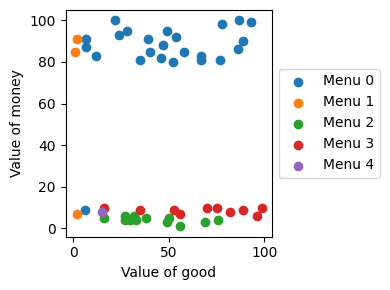

In [175]:
# let's visualize the menus by plots 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(1, 1, figsize=(4,3))
digits = 4
for i, b in enumerate(menus): 
    print(f"Menu {i}: {np.round(b[0], digits)} got; {np.round(b[1], digits)} spent; {np.round(b[2], digits)} burned")
    agents_i = menus[b]
    ax.scatter(agents[agents_i, 0], agents[agents_i, 1], color = colors[i], label = f"Menu {i}")

ax.set_xlabel("Value of good")
ax.set_ylabel("Value of money")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [150]:
# Check IR and IC constraints
eps = 1e-4
for i in range(N):
    util_i = agents[i][0] * allocations[i] - agents[i][1] * prices[i] - times[i]
    if util_i + eps < 0: print(f"IR violated at {i}")
    for j in range(N):
        if i != j:
            util_j = agents[i][0] * allocations[j] - agents[i][1] * prices[j] - times[j]
            if util_i + eps < util_j:
                print(f"IC violated at ({i}, {j})")
                print(f"Utility of i: {util_i}; Utility of j: {util_j}")
